In [10]:
import numpy as np
from skimage import measure, transform
import matplotlib.pyplot as plt

from mrcnn import utils as mrcnn_utils
from mrcnn.visualize import display_instances

from corebreakout import utils, viz
from corebreakout.datasets import PolygonDataset

In [2]:
dataset = PolygonDataset()

In [3]:
dataset.collect_annotated_images('../data', 'two_image_dataset')

In [4]:
dataset.prepare()

In [5]:
print(dataset)


 PolygonDataset
Image count : 2
Class count : 3
  0. BG                                                
  1. col                                               
  2. tray                                              


In [6]:
print(dataset.image_reference(0))

../data/two_image_dataset/S00101265.jpeg


In [7]:
img = dataset.load_image(0)
masks, class_ids = dataset.load_mask(0)
print(class_ids)

labels = utils.masks_to_labels(masks)
all_regions = measure.regionprops(labels)

col_masks = masks[:,:,class_ids==1]
col_labels = utils.masks_to_labels(col_masks)
col_regions = measure.regionprops(col_labels)

[1 2 1]


In [8]:
tray_masks = masks[:,:,class_ids==2]
tray_labels = utils.masks_to_labels(tray_masks)
tray_regions = measure.regionprops(tray_labels)

In [9]:
np.shape(labels)

(4757, 7105)

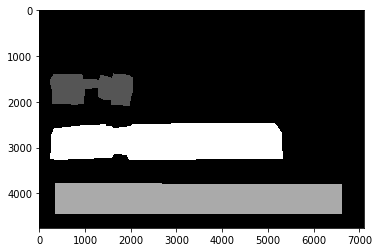

In [11]:
plt.imshow(labels, cmap='gray', vmax=3)

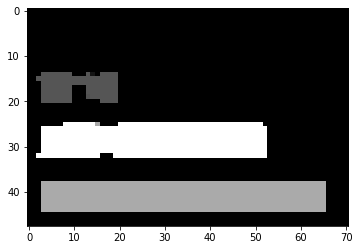

In [31]:
resized_labels = transform.rescale(labels, 0.01, multichannel=False, 
                                   anti_aliasing=False, preserve_range=True)

plt.imshow(resized_labels, cmap='gray')#, vmax=3)

In [32]:
np.save('example_labels.npy', resized_labels.astype(int))

In [33]:
masks = []

for i in range(1,4):
    masks.append((resized_labels.astype(int)==i).astype(int))
    
masks = np.stack(masks, axis=-1)

masks.shape

(48, 71, 3)

In [36]:
regions = measure.regionprops(resized_labels.astype(int))

[(r.label, r.bbox) for r in regions]

[(1, (14, 2, 26, 20)), (2, (38, 3, 45, 66)), (3, (25, 2, 33, 53))]

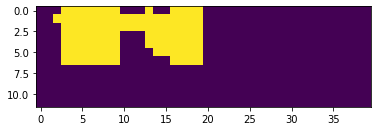

In [49]:
cropped_region = utils.crop_region(resized_labels[:,:,np.newaxis], resized_labels, regions[0],
                                   axis=0, endpts=(0,40))

plt.imshow(np.squeeze(cropped_region))

In [38]:
utils.maximum_extent(regions, 1)

(14, 45)

In [41]:
r1, r2 = regions[0], regions[2]

utils.v_overlapping(r1, r2)

True

In [34]:
np.array_equal(utils.masks_to_labels(masks), resized_labels.astype(int))

True

In [35]:
np.save('example_masks.npy', masks)

In [23]:
#np.save('example_masks.npy', masks)
#np.save('example_labels.npy', labels)
#np.save('example_col_labels.npy', col_labels)

In [49]:
bboxes = mrcnn_utils.extract_bboxes(masks)

def alter_bboxes(bboxes, class_ids, endpts):
    temp_bboxes = np.copy(bboxes)
    for i in range(class_ids.size):
        if class_ids[i] == 1:
            if bboxes[i,1] > endpts[0]:
                temp_bboxes[i,1] = endpts[0]
            if bboxes[i,3] < endpts[1]:
                temp_bboxes[i,3] = endpts[1]
    return temp_bboxes

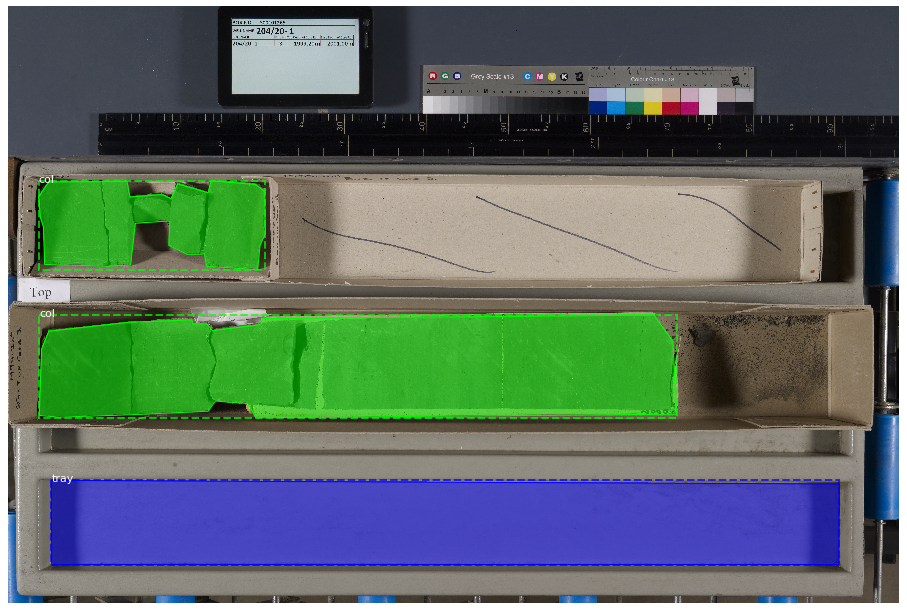

<Figure size 432x288 with 0 Axes>

In [32]:
display_instances(img, bboxes, masks, class_ids, dataset.class_names,
                 colors=[(0,0,1), (0,1,0), (0,1,0)])

(242, 5332)


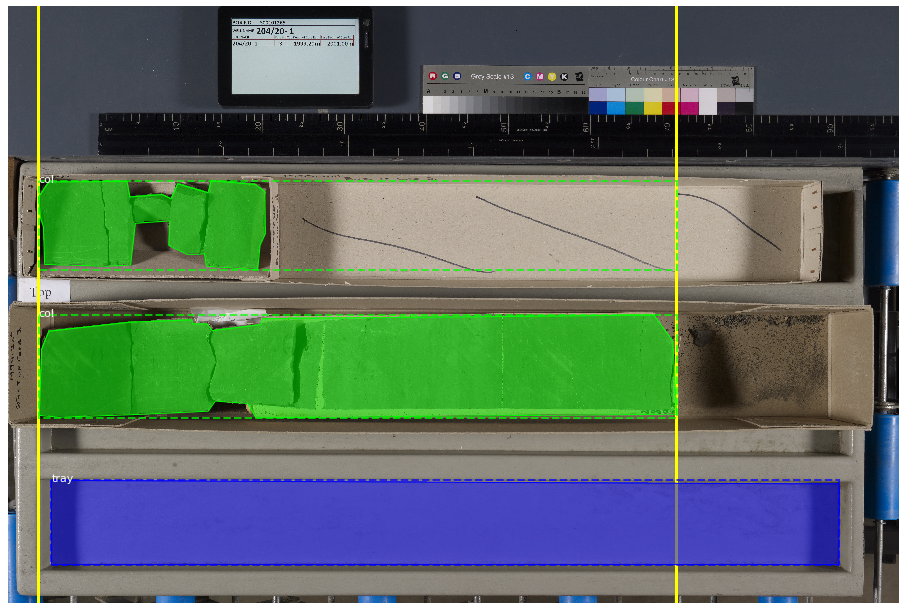

In [50]:
img = dataset.load_image(0)
endpts = utils.maximum_extent(col_regions, 0)
print(endpts)

temp_img = viz.draw_lines(img, endpts, 1, color=[255,255,0], lw=25)

adjusted_bboxes = alter_bboxes(bboxes, class_ids, endpts)

display_instances(temp_img, adjusted_bboxes, masks, class_ids, 
                  dataset.class_names, colors=[(0,0,1), (0,1,0), (0,1,0)])

(242, 6632)


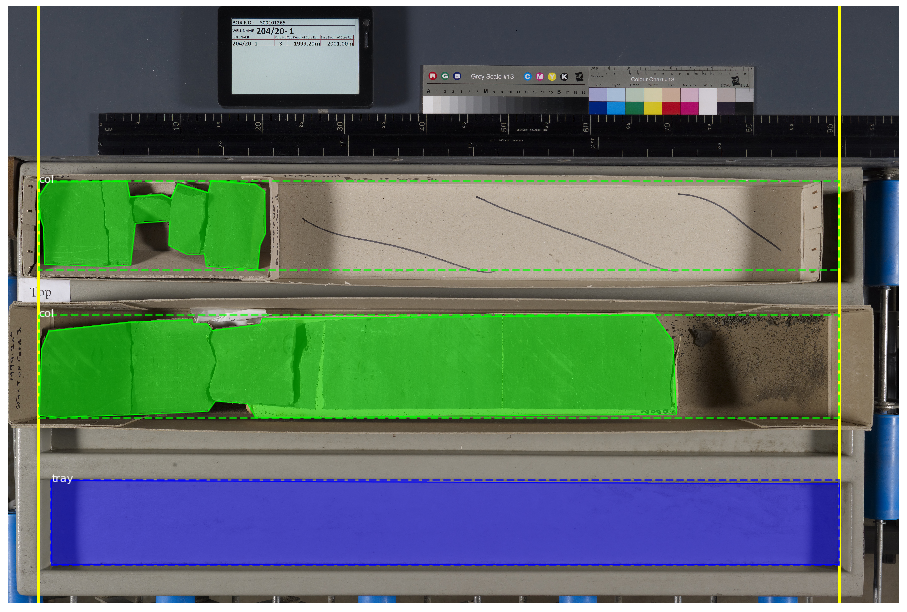

In [51]:
img = dataset.load_image(0)
endpts = utils.maximum_extent(all_regions, 0)
print(endpts)

temp_img = viz.draw_lines(img, endpts, 1, color=[255,255,0], lw=25)

adjusted_bboxes = alter_bboxes(bboxes, class_ids, endpts)

display_instances(temp_img, adjusted_bboxes, masks, class_ids, 
                  dataset.class_names, colors=[(0,0,1), (0,1,0), (0,1,0)])

(342, 6632)


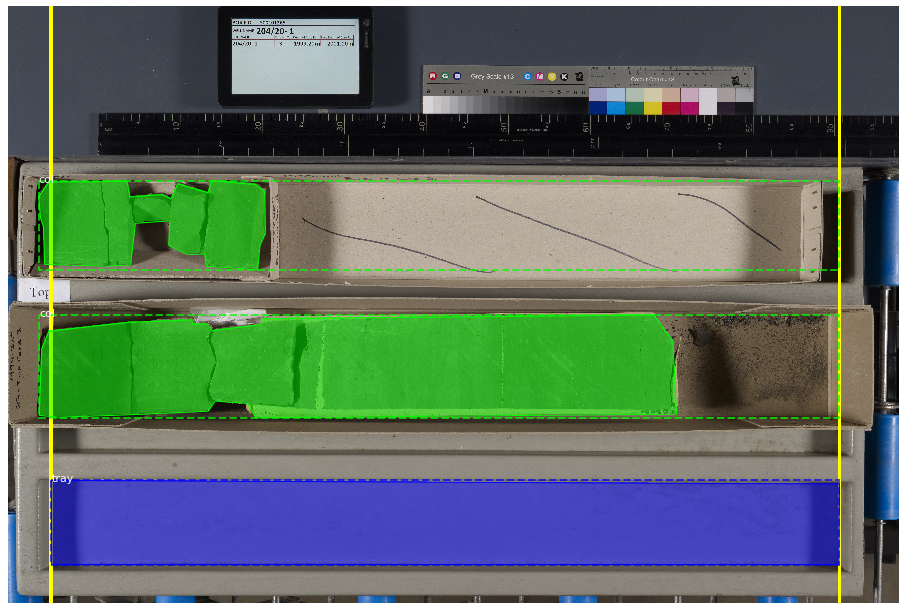

In [52]:
img = dataset.load_image(0)
endpts = utils.maximum_extent(tray_regions, 0)
print(endpts)

temp_img = viz.draw_lines(img, endpts, 1, color=[255,255,0], lw=25)

adjusted_bboxes = alter_bboxes(bboxes, class_ids, endpts)

display_instances(temp_img, adjusted_bboxes, masks, class_ids, 
                  dataset.class_names, colors=[(0,0,1), (0,1,0), (0,1,0)])

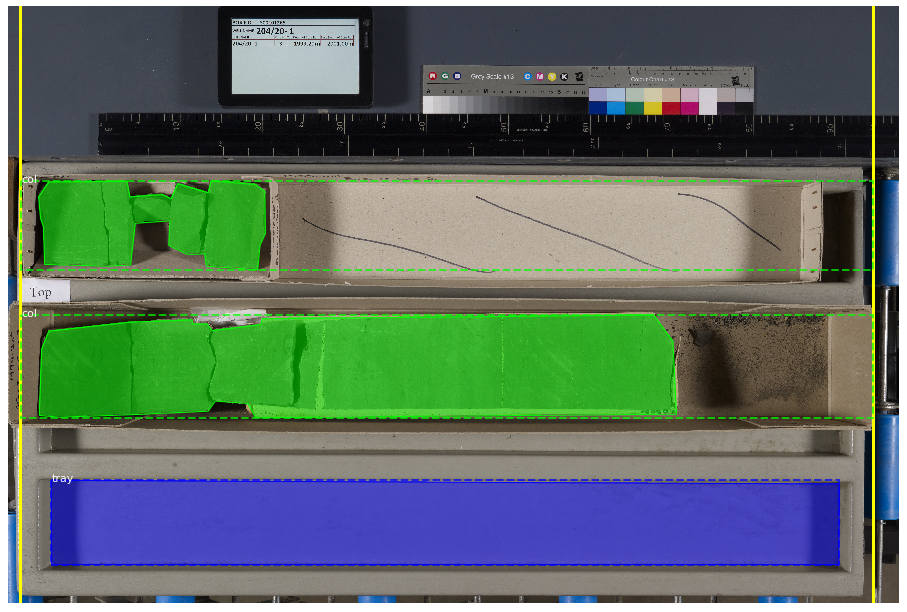

In [54]:
img = dataset.load_image(0)
endpts = (100,6900)

temp_img = viz.draw_lines(img, endpts, 1, color=[255,255,0], lw=25)

adjusted_bboxes = alter_bboxes(bboxes, class_ids, endpts)

display_instances(temp_img, adjusted_bboxes, masks, class_ids, 
                  dataset.class_names, colors=[(0,0,1), (0,1,0), (0,1,0)])

In [48]:
alter_bboxes(bboxes, class_ids, endpts)

array([[3775,  342, 4446, 6632],
       [1384,  242, 2094, 6632],
       [2456,  247, 3275, 6632]], dtype=int32)

In [51]:
import tensorflow as tf
tf.__version__

'1.14.0'